
## Základní popisná statistika

## Cíl lekce
- Intuitivně pochopit **míry polohy** (průměr, medián, modus) a **míry variability** (rozpětí, rozptyl, směrodatná odchylka, IQR).
- Naučit se **počítat** a **interpretovat** tyto míry na **malém, přehledném datasetu**.
- Porozumět **percentilům** a **kvartilům** a umět je číst.

## Teoretický koncept 1: Základní pojmy
**Datová sada** je konečná množina číselných hodnot. Jednotlivá čísla nazýváme **pozorování**. Počet pozorování značíme $n$.

## Teoretický koncept 2: Míry polohy
- **Aritmetický průměr** ("střed" dat, citlivý na extrémy)

$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i
$$
**Vysvětlení symbolů:**  
- $\bar{x}$ : aritmetický průměr (mean)  
- $n$ : počet pozorování  
- $\sum_{i=1}^{n}$ : součet od $i=1$ do $i=n$  
- $x_i$ : i-tá hodnota v datové sadě  
- $\tfrac{1}{n}$ : průměrování (dělení počtem prvků)

- **Medián**: prostřední hodnota po seřazení (u sudého počtu průměr dvou prostředních).  
- **Modus**: nejčastější hodnota (u spojitých dat nemusí být jednoznačně definován).

## Teoretický koncept 3: Míry variability
- **Rozpětí (range)**: rozdíl mezi maximem a minimem: $\max(x) - \min(x)$.  

- **Rozptyl (variance)** – zde používáme **populační** verzi pro jednoduchost výuky:

$$
\sigma^{2} = \frac{1}{n}\sum_{i=1}^{n} (x_i - \bar{x})^2
$$
**Vysvětlení symbolů:**  
- $\sigma^{2}$ : rozptyl  
- $(x_i - \bar{x})$ : odchylka i-té hodnoty od průměru  
- $(\cdot)^2$ : umocnění na druhou (kvadratizace odchylky)  
- ostatní symboly jako u vzorce pro průměr

- **Směrodatná odchylka (standard deviation)** – je odmocnina z rozptylu:

$$
\sigma = \sqrt{\sigma^{2}}
$$
**Vysvětlení symbolů:** $\sqrt{\cdot}$ je druhá odmocnina; $\sigma$ má stejnou jednotku jako původní data.

- **IQR (Interquartile Range)**: šířka středních 50 % dat, definována jako $\mathrm{IQR} = Q_3 - Q_1$, kde $Q_1$ je 25. percentil a $Q_3$ je 75. percentil.



## Teoretický koncept 4: Percentily a kvartily
**Percentil** je hodnota, pod kterou leží dané procento dat. Například 90. percentil znamená, že 90 % hodnot je **nižších nebo rovných** této hodnotě.  
**Kvartily** jsou speciální percentily: $Q_1=25\%$, $Q_2=50\%$ (medián), $Q_3=75\%$.

## Tabulky s příklady
Budeme pracovat s **minidatasetem** (seřazené hodnoty): **3, 4, 5, 6, 7, 8**.  
Počet pozorování: **$n=6$**.  
**Průměr**: $\bar{x} = \tfrac{3+4+5+6+7+8}{6} = \tfrac{33}{6} = 5{,}5$.

| i | $x_i$ | $(x_i - \bar{x})$ | $\bigl(x_i - \bar{x}\bigr)^2$ |
|---|------:|--------------------:|--------------------------------:|
| 1 | 3     | -2,5               | 6,25                            |
| 2 | 4     | -1,5               | 2,25                            |
| 3 | 5     | -0,5               | 0,25                            |
| 4 | 6     | 0,5                | 0,25                            |
| 5 | 7     | 1,5                | 2,25                            |
| 6 | 8     | 2,5                | 6,25                            |
|   | **Součet** | –            | **17,5**                         |

- **Rozptyl (populační)**: $\sigma^2 = \tfrac{17{,}5}{6} \approx 2{,}9167$.  
- **Směrodatná odchylka**: $\sigma \approx 1{,}7078$.  
- **Rozpětí**: $8-3 = 5$.  
- **Medián**: $\tfrac{5+6}{2} = 5{,}5$.  
- **IQR**: (ilustrační – dle definice kvartilů).

**Vliv odlehlé hodnoty (outlier):** změňme poslední hodnotu na **20**.  
Seřazené hodnoty: **3, 4, 5, 6, 7, 20**.  
$\bar{x} = \tfrac{3+4+5+6+7+20}{6} = \tfrac{45}{6} = 7{,}5$.

| i | $x_i$ | $(x_i - \bar{x})$ | $\bigl(x_i - \bar{x}\bigr)^2$ |
|---|------:|--------------------:|--------------------------------:|
| 1 | 3     | -4,5               | 20,25                           |
| 2 | 4     | -3,5               | 12,25                           |
| 3 | 5     | -2,5               | 6,25                            |
| 4 | 6     | -1,5               | 2,25                            |
| 5 | 7     | -0,5               | 0,25                            |
| 6 | 20    | 12,5               | 156,25                          |
|   | **Součet** | –            | **197,5**                        |

- **Rozptyl (populační)**: $\sigma^2 = \tfrac{197{,}5}{6} \approx 32{,}9167$.  
- **Směrodatná odchylka**: $\sigma \approx 5{,}7370$.  
- **Poznámka:** Průměr i směrodatná odchylka jsou **citlivé** na extrémy, IQR je **robustnější**.

## Import knihoven

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Praktické ukázky
V kódu provádíme **jen výpočty a grafy**. Statické tabulky a interpretace zůstávají v **markdownu**.

### Mini-data a základní výpočty
Definujeme mini-dataset a spočítáme průměr, rozptyl a směrodatnou odchylku. Číselné výsledky vysvětlujeme výše; zde necháváme čisté výpočty pro případné další grafy.

In [2]:
x = np.array([3, 4, 5, 6, 7, 8], dtype=float)
mean = x.mean()
var = np.mean((x - mean)**2)
std = np.sqrt(var)

### Histogram mini-dat

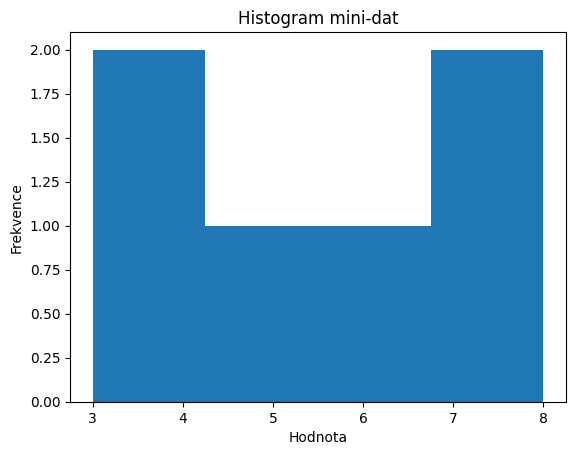

In [3]:
plt.figure()
plt.hist(x, bins='auto')
plt.title('Histogram mini-dat')
plt.xlabel('Hodnota')
plt.ylabel('Frekvence')
plt.show()

### Boxplot mini-dat

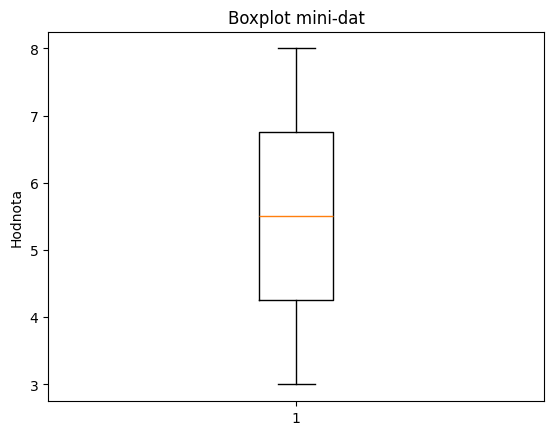

In [4]:
plt.figure()
plt.boxplot(x, vert=True)
plt.title('Boxplot mini-dat')
plt.ylabel('Hodnota')
plt.show()

### Vliv odlehlé hodnoty (outlier) – přepočet (bez tisků)

In [5]:
x_out = np.array([3, 4, 5, 6, 7, 20], dtype=float)
mean_o = x_out.mean()
var_o = np.mean((x_out - mean_o)**2)
std_o = np.sqrt(var_o)

#### Histogram s outlierem

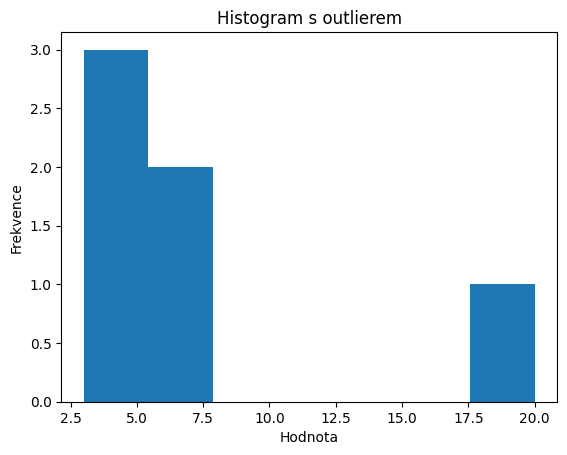

In [6]:
plt.figure()
plt.hist(x_out, bins='auto')
plt.title('Histogram s outlierem')
plt.xlabel('Hodnota')
plt.ylabel('Frekvence')
plt.show()

#### Boxplot s outlierem

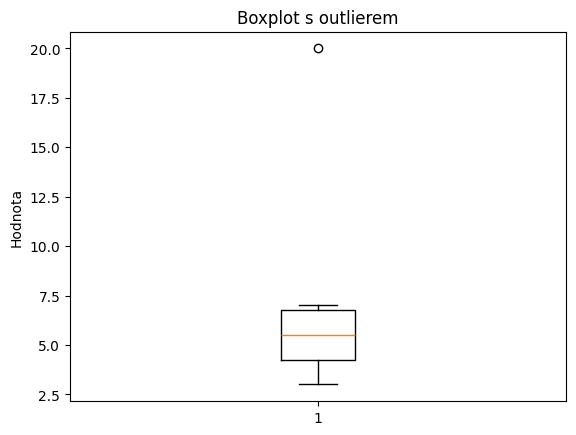

In [7]:
plt.figure()
plt.boxplot(x_out, vert=True)
plt.title('Boxplot s outlierem')
plt.ylabel('Hodnota')
plt.show()

### Percentily a percentile-of-score
Zde spočteme percentily a percentil, v němž leží konkrétní hodnota; interpretaci najdeš v teoretické části.

In [8]:
p25, p50, p75 = np.percentile(x, [25, 50, 75])
perc_of_6 = stats.percentileofscore(x, 6)